In [47]:
# Load all json files in /media/naren/NarenSSD1/naren_research/bdd100kDataset/bdd100k_labels_release/bdd100k/labels

import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2

# Load all json files in /media/naren/NarenSSD1/naren_research/bdd100kDataset/bdd100k_labels_release/bdd100k/labels
jsonPath = '/media/naren/NarenSSD1/naren_research/bdd100kDataset/bdd100k_labels_release/bdd100k/labels'
jsonFiles = os.listdir(jsonPath)

# Print the names of the json files
print(jsonFiles)

['bdd100k_labels_images_train.json', 'bdd100k_labels_images_val.json']


In [48]:
# Make paths to the train and val json files
trainJsonPath = os.path.join(jsonPath, 'bdd100k_labels_images_train.json')
valJsonPath = os.path.join(jsonPath, 'bdd100k_labels_images_val.json')

In [49]:
# Load the json files
jsonFile = jsonFiles[0]
jsonFile = os.path.join(jsonPath, jsonFile)
with open(jsonFile) as f:
    data = json.load(f)

In [50]:
item = data[0]
print('Name:', item['name'])
print('Attributes:', item['attributes'])
print('Timestamp:', item['timestamp'])
print('Labels:', item['labels'])

Name: 0000f77c-6257be58.jpg
Attributes: {'weather': 'clear', 'scene': 'city street', 'timeofday': 'daytime'}
Timestamp: 10000
Labels: [{'category': 'traffic light', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'green'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1125.902264, 'y1': 133.184488, 'x2': 1156.978645, 'y2': 210.875445}, 'id': 0}, {'category': 'traffic light', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'green'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1156.978645, 'y1': 136.637417, 'x2': 1191.50796, 'y2': 210.875443}, 'id': 1}, {'category': 'traffic sign', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'none'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1101.731743, 'y1': 211.122087, 'x2': 1170.79037, 'y2': 233.566141}, 'id': 2}, {'category': 'traffic sign', 'attributes': {'occluded': False, 'truncated': True, 'trafficLightCol

In [51]:
# See contents of labels in a pretty format
label_item = item['labels'][0]
print(label_item.keys())

dict_keys(['category', 'attributes', 'manualShape', 'manualAttributes', 'box2d', 'id'])


In [52]:
# How many items are there in the json file?
print(len(data))

69863


In [53]:
weather = {}
for item in data:
    condition = item['attributes']['weather']
    if condition in weather:
        weather[condition] += 1
    else:
        weather[condition] = 1
print(weather)

{'clear': 37344, 'rainy': 5070, 'undefined': 8119, 'snowy': 5549, 'overcast': 8770, 'partly cloudy': 4881, 'foggy': 130}


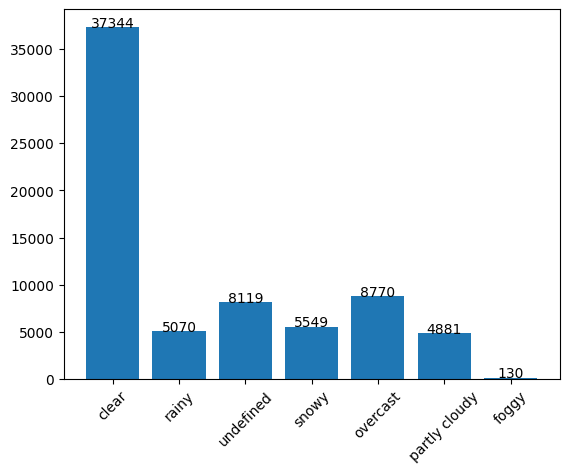

In [54]:
# Make a bar graph of the weather conditions
plt.bar(weather.keys(), weather.values())

# Add the values to the bar graph
for key, value in weather.items():
    plt.text(key, value, str(value), ha='center')

# Tilting the x-axis labels
plt.xticks(rotation=45)
plt.show()


In [55]:
scene = {}
for item in data:
    condition = item['attributes']['scene']
    if condition in scene:
        scene[condition] += 1
    else:
        scene[condition] = 1
print(scene)

{'city street': 43516, 'highway': 17379, 'residential': 8074, 'parking lot': 377, 'undefined': 361, 'tunnel': 129, 'gas stations': 27}


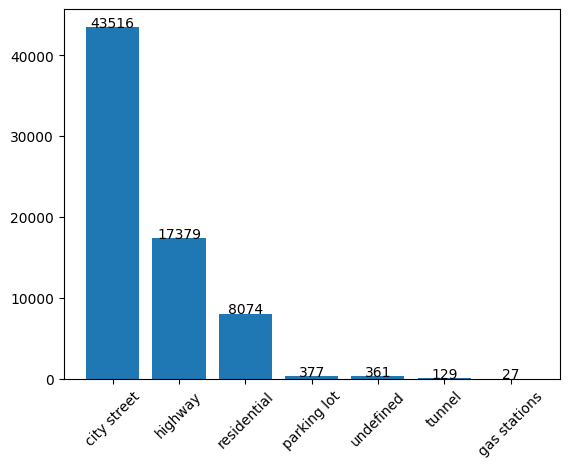

In [56]:
# Make a bar graph of the weather conditions
plt.bar(scene.keys(), scene.values())

# Add the values to the bar graph
for key, value in scene.items():
    plt.text(key, value, str(value), ha='center')

# Tilting the x-axis labels
plt.xticks(rotation=45)
plt.show()

In [57]:
import os

# The path to the entire dataset that has train, val and test folders
imagePath = '/media/naren/NarenSSD1/naren_research/bdd100kDataset/bdd100k_images_100k/bdd100k/images/100k'

# The path to the train folder
trainPath = os.path.join(imagePath, 'train')

# The path to the val folder
valPath = os.path.join(imagePath, 'val')

# The path to the test folder
testPath = os.path.join(imagePath, 'test')

In [58]:
# Count number of images in train, val and test folders
trainImages = os.listdir(trainPath)
valImages = os.listdir(valPath)
testImages = os.listdir(testPath)

print('Number of images in train folder:', len(trainImages))
print('Number of images in val folder:', len(valImages))
print('Number of images in test folder:', len(testImages))

Number of images in train folder: 70000
Number of images in val folder: 10000
Number of images in test folder: 20000


In [59]:
# Count number of images of each weather condition in train folder (trainImages)
# Note: The condition is in the json file at trainJsonPath

with open(trainJsonPath, 'r') as f:
    data = json.load(f)

trainWeather = {}
for item in data:
    condition = item['attributes']['weather']
    if condition in trainWeather:
        trainWeather[condition] += 1
    else:
        trainWeather[condition] = 1

print(trainWeather)

{'clear': 37344, 'rainy': 5070, 'undefined': 8119, 'snowy': 5549, 'overcast': 8770, 'partly cloudy': 4881, 'foggy': 130}


In [60]:
# Count number of images of each weather condition in val folder (trainImages)
# Note: The condition is in the json file at jsonPathVal

with open(valJsonPath, 'r') as f:
    data = json.load(f)

valWeather = {}
for item in data:
    condition = item['attributes']['weather']
    if condition in valWeather:
        valWeather[condition] += 1
    else:
        valWeather[condition] = 1

print(valWeather)

{'overcast': 1239, 'clear': 5346, 'undefined': 1157, 'rainy': 738, 'snowy': 769, 'partly cloudy': 738, 'foggy': 13}


In [61]:
# Count number of images of each scene in train folder (trainImages)
# Note: The scene is in the json file at trainJsonPath

with open(trainJsonPath, 'r') as f:
    data = json.load(f)

trainScene = {}
for item in data:
    condition = item['attributes']['scene']
    if condition in trainScene:
        trainScene[condition] += 1
    else:
        trainScene[condition] = 1

print(trainScene)

{'city street': 43516, 'highway': 17379, 'residential': 8074, 'parking lot': 377, 'undefined': 361, 'tunnel': 129, 'gas stations': 27}


In [62]:
# Count number of images of each scene in val folder (valImages)
# Note: The scene is in the json file at valJsonPath

with open(valJsonPath, 'r') as f:
    data = json.load(f)

valScene = {}
for item in data:
    condition = item['attributes']['scene']
    if condition in valScene:
        valScene[condition] += 1
    else:
        valScene[condition] = 1

print(valScene)

{'city street': 6112, 'highway': 2499, 'tunnel': 27, 'residential': 1253, 'parking lot': 49, 'gas stations': 7, 'undefined': 53}


In [63]:
# Print a table of the number of images of each weather condition and each scene in train and val folders
print('Weather conditions in train folder')
print(trainWeather)
print('Weather conditions in val folder')
print(valWeather)
print('Scene conditions in train folder')
print(trainScene)
print('Scene conditions in val folder')
print(valScene)

Weather conditions in train folder
{'clear': 37344, 'rainy': 5070, 'undefined': 8119, 'snowy': 5549, 'overcast': 8770, 'partly cloudy': 4881, 'foggy': 130}
Weather conditions in val folder
{'overcast': 1239, 'clear': 5346, 'undefined': 1157, 'rainy': 738, 'snowy': 769, 'partly cloudy': 738, 'foggy': 13}
Scene conditions in train folder
{'city street': 43516, 'highway': 17379, 'residential': 8074, 'parking lot': 377, 'undefined': 361, 'tunnel': 129, 'gas stations': 27}
Scene conditions in val folder
{'city street': 6112, 'highway': 2499, 'tunnel': 27, 'residential': 1253, 'parking lot': 49, 'gas stations': 7, 'undefined': 53}


In [64]:
# Reorder the trainWeather and valWeather dictionaries in alphabetical order
trainWeather = dict(sorted(trainWeather.items()))
valWeather = dict(sorted(valWeather.items()))

# Reorder the trainScene and valScene dictionaries in alphabetical order
trainScene = dict(sorted(trainScene.items()))
valScene = dict(sorted(valScene.items()))

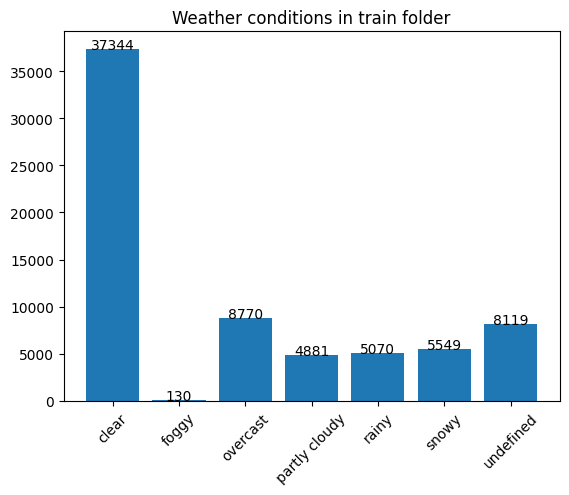

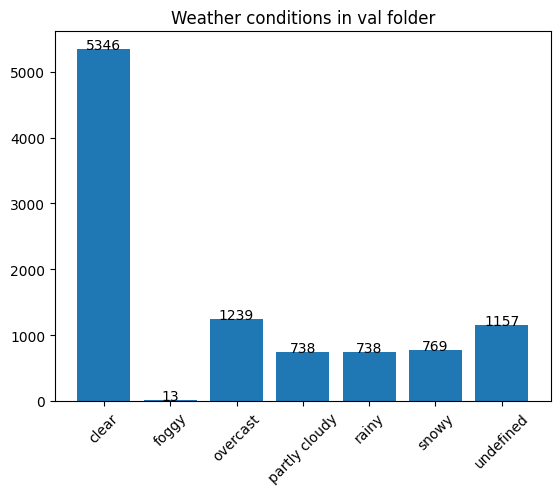

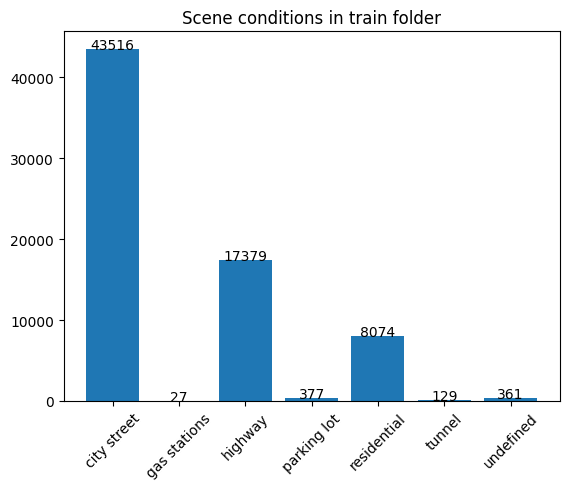

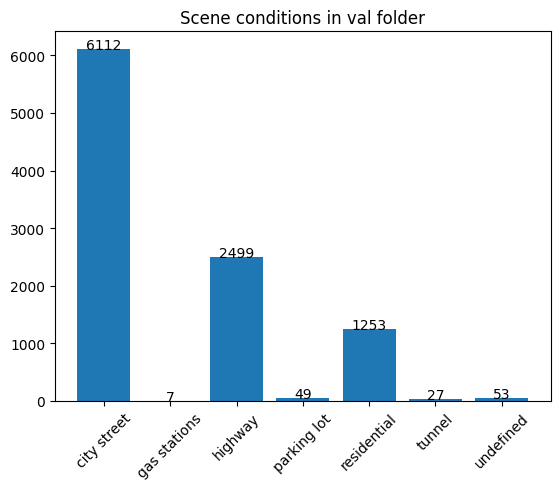

In [65]:

# Make a bar graph of the weather conditions
plt.bar(trainWeather.keys(), trainWeather.values())

# Add the values to the bar graph
for key, value in trainWeather.items():
    plt.text(key, value, str(value), ha='center')

# Tilting the x-axis labels
plt.xticks(rotation=45)

# Set the title of the graph
plt.title('Weather conditions in train folder')
plt.show()

# Make a bar graph of the weather conditions
plt.bar(valWeather.keys(), valWeather.values())

# Add the values to the bar graph
for key, value in valWeather.items():
    plt.text(key, value, str(value), ha='center')

# Tilting the x-axis labels
plt.xticks(rotation=45)

# Set the title of the graph
plt.title('Weather conditions in val folder')
plt.show()   

# Make a bar graph of the scene conditions
plt.bar(trainScene.keys(), trainScene.values())

# Add the values to the bar graph
for key, value in trainScene.items():
    plt.text(key, value, str(value), ha='center')

# Tilting the x-axis labels
plt.xticks(rotation=45)

# Set the title of the graph
plt.title('Scene conditions in train folder')
plt.show()

# Make a bar graph of the scene conditions
plt.bar(valScene.keys(), valScene.values())

# Add the values to the bar graph
for key, value in valScene.items():
    plt.text(key, value, str(value), ha='center')

# Tilting the x-axis labels
plt.xticks(rotation=45)

# Set the title of the graph
plt.title('Scene conditions in val folder')
plt.show()

/tmp/ipykernel_33828/940514228.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(trainWeather.keys(), rotation=45)
/tmp/ipykernel_33828/940514228.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(valWeather.keys(), rotation=45)
/tmp/ipykernel_33828/940514228.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(trainScene.keys(), rotation=45)
/tmp/ipykernel_33828/940514228.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(valScene.keys(), rotation=45)


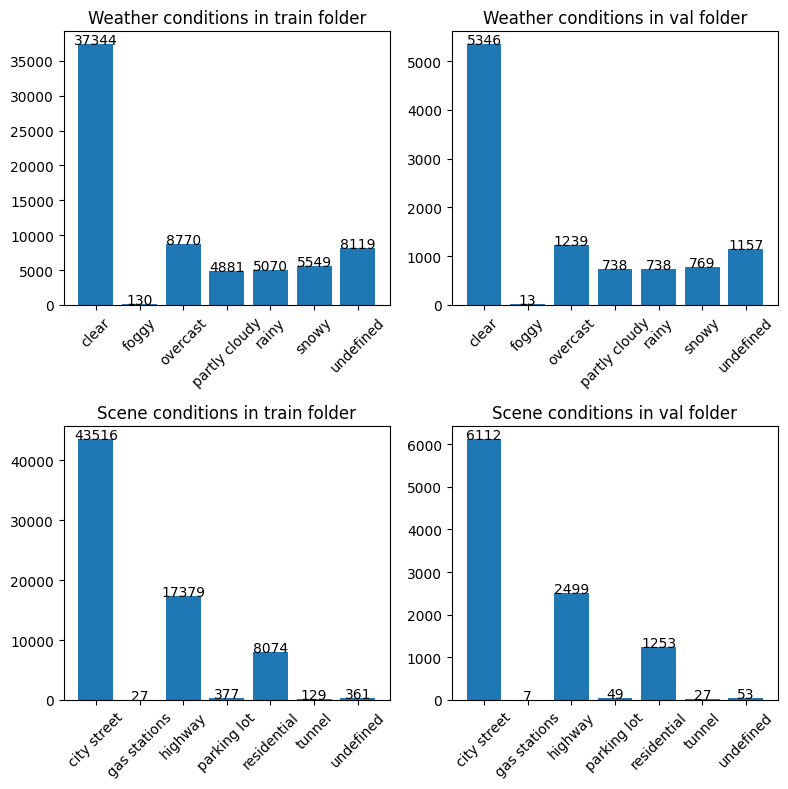

In [66]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)

# Make a bar graph of the weather conditions in train folder
axs[0, 0].bar(trainWeather.keys(), trainWeather.values())

# Add the values to the bar graph
for key, value in trainWeather.items():
    axs[0, 0].text(key, value, str(value), ha='center')

# Tilting the x-axis labels
axs[0, 0].set_xticklabels(trainWeather.keys(), rotation=45)

# Set the title of the graph
axs[0, 0].set_title('Weather conditions in train folder')

# Make a bar graph of the weather conditions in val folder
axs[0, 1].bar(valWeather.keys(), valWeather.values())

# Add the values to the bar graph
for key, value in valWeather.items():
    axs[0, 1].text(key, value, str(value), ha='center')

# Tilting the x-axis labels
axs[0, 1].set_xticklabels(valWeather.keys(), rotation=45)

# Set the title of the graph
axs[0, 1].set_title('Weather conditions in val folder')

# Make a bar graph of the scene conditions in train folder
axs[1, 0].bar(trainScene.keys(), trainScene.values())

# Add the values to the bar graph
for key, value in trainScene.items():
    axs[1, 0].text(key, value, str(value), ha='center')

# Tilting the x-axis labels
axs[1, 0].set_xticklabels(trainScene.keys(), rotation=45)

# Set the title of the graph
axs[1, 0].set_title('Scene conditions in train folder')

# Make a bar graph of the scene conditions in val folder
axs[1, 1].bar(valScene.keys(), valScene.values())

# Add the values to the bar graph
for key, value in valScene.items():
    axs[1, 1].text(key, value, str(value), ha='center')

# Tilting the x-axis labels
axs[1, 1].set_xticklabels(valScene.keys(), rotation=45)

# Set the title of the graph
axs[1, 1].set_title('Scene conditions in val folder')

# Set the size of the figure
fig.set_size_inches(8, 8)

# Adjust the spacing between the subplots
fig.tight_layout()

plt.show()

In [67]:
# We have the train and val json files at trainJsonPath and valJsonPath respectively
# We have the train, val and test images at trainPath, valPath and testPath respectively

/tmp/ipykernel_33828/1034985595.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  axs[i, j].imshow(imageio.imread(images[i * 5 + j]))


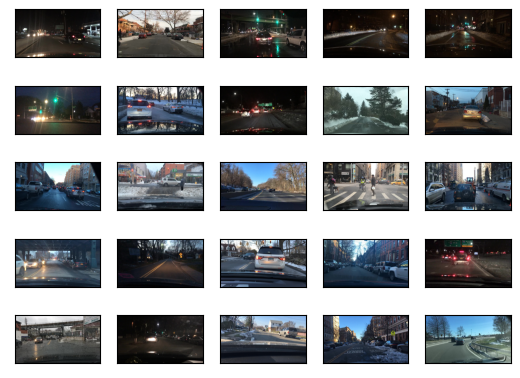

In [68]:
# I need to get 25 random images from trainPath and valPath each that have 'snowy' weather condition and show them in a 5x5 grid

import json
import random
from pathlib import Path

import imageio
import matplotlib.pyplot as plt

def get_random_images(json_path, images_path, weather_condition, n):
    with open(json_path, 'r') as f:
        data = json.load(f)

    # Get all images with the specified weather condition
    images = [item['name'] for item in data if item['attributes']['weather'] == weather_condition]

    # Select n random images
    random_images = random.sample(images, n)

    # Get the full path of the selected images
    image_paths = [str(Path(images_path) / image) for image in random_images]

    return image_paths

# Get 25 random images with the 'snowy' weather condition from the train folder
train_images = get_random_images(trainJsonPath, trainPath, 'snowy', 25)

# Get 25 random images with the 'snowy' weather condition from the validation folder
val_images = get_random_images(valJsonPath, valPath, 'snowy', 25)

# Combine the train and validation images
images = train_images + val_images

fig, axs = plt.subplots(5, 5)

for i in range(5):
    for j in range(5):
        # Read and display the image
        axs[i, j].imshow(imageio.imread(images[i * 5 + j]))

        # Remove the axis ticks
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

plt.show()